# EC7212 – Computer Vision and Image Processing

## Take Home Assignment 2 - Question 1

## EG/2020/4330 - Sheshan K.H.N.

 #### [GitHub Repository]()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.filters import threshold_otsu
import os

In [6]:
# Create a synthetic image with two square objects and background
image_size = (100, 100)
synthetic_image = np.full(image_size, 50, dtype=np.uint8)  # background
synthetic_image[20:50, 20:50] = 150  # first object
synthetic_image[60:90, 60:90] = 200  # second object

# Add Gaussian noise and rescale to 0-255
noisy_image = random_noise(synthetic_image, mode='gaussian', var=0.01)
noisy_image = (noisy_image * 255).astype(np.uint8)

# Compute Otsu's threshold for segmentation
threshold_value = threshold_otsu(noisy_image)
print(f"Otsu's Threshold: {threshold_value}")


Otsu's Threshold: 113


In [7]:
# Segment the image using Otsu's threshold
segmented_image_otsu_obj1 = (noisy_image > threshold_value).astype(np.uint8) * 255

# First Otsu threshold to separate background from objects
thresh1 = threshold_otsu(noisy_image)
binary_background_and_objects = noisy_image > thresh1

# Extract pixels belonging to objects for further thresholding
object_pixels = noisy_image[binary_background_and_objects]

# Second Otsu threshold to separate the two objects
thresh2 = threshold_otsu(object_pixels)
    
# Create the final segmented image with three regions: background, object1, object2
segmented_image_final = np.zeros_like(noisy_image)
segmented_image_final[noisy_image < thresh1] = 0 
segmented_image_final[(noisy_image >= thresh1) & (noisy_image < thresh2)] = 150 
segmented_image_final[noisy_image >= thresh2] = 255 

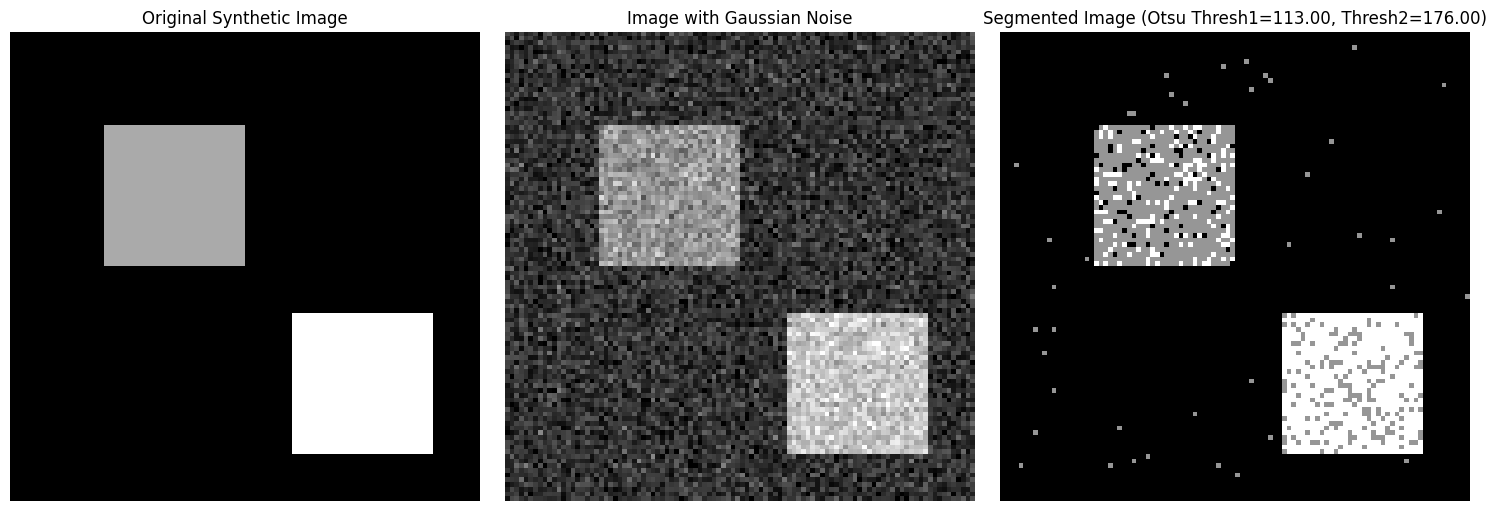

In [8]:
output_dir = "output_images"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(synthetic_image, cmap='gray')
plt.title('Original Synthetic Image')
plt.axis('off')
plt.savefig(os.path.join(output_dir, 'original_synthetic_image.png'))

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Image with Gaussian Noise')
plt.axis('off')
plt.savefig(os.path.join(output_dir, 'image_gaussian_noise.png'))

plt.subplot(1, 3, 3)
plt.imshow(segmented_image_final, cmap='gray')
plt.title(f'Segmented Image (Otsu Thresh1={thresh1:.2f}, Thresh2={thresh2:.2f})')
plt.axis('off')
plt.savefig(os.path.join(output_dir, 'segmented_image_otsu.png'))

plt.tight_layout()
plt.show()
